In [1]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [6]:
X = [6,8,10,14,18]
Y = [7,9,13,17.5,18]

[0, 25, 0, 25]

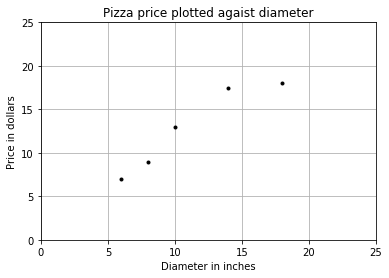

In [15]:
# plt.figure()
plt.title('Pizza price plotted agaist diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, Y, 'k.')
plt.grid(True)
plt.axis([0,25,0,25])  # sets the min and max of the x and y axes, with v = [xmin, xmax, ymin, ymax]

###  fit the model

In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
import numpy as np

In [89]:
model = LinearRegression()
X = np.array([6,8,10,14,18]).reshape(-1,1) # fit accept 2d-array as input
Y = np.array([7,9,13,17.5,18]).reshape(-1,1)
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
model.predict([[12]])[0][0]

13.681034482758621

In [98]:
print 'A 12" pizza should cost: ${0:.2f}'.format(model.predict([[12]])[0][0])

A 12" pizza should cost: $13.68


###  evaluate model fitness using cost function
**residual sum of squares** cost function

In [117]:
rss = np.sum((model.predict(X)-Y) ** 2) 
print 'residual sum of squares is {0:.4f}'.format(rss)

residual sum of squares is 8.7478


### solve ordinary least squares

In [49]:
var_x = np.var(X,ddof=1)  # sample variance
print 'variance of X is {0:.2f}'.format(var_x)

variance of X is 23.20


"Delta Degrees of Freedom": the divisor used in the calculation is
``N - ddof``, where ``N`` represents the number of elements.

In [68]:
cov = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]
print cov

22.65


In [69]:
beta = cov / var_x
print 'β is {0:.2f}'.format(beta)

β is 0.98


In [75]:
alpha = np.average(Y) - beta*np.average(X)
print 'α is {0:.2f}'.format(alpha)

α is 1.97


### evaluate the model

In [80]:
X_test = np.array([8,9,11,16,12]).reshape(-1,1)
Y_test = np.array([11,8.5,15,18,11]).reshape(-1,1)

In [86]:
print 'R-squared is {0:.4f}'.format(model.score(X_test, Y_test))

R-squared is 0.6620


In [122]:
# compute r-square manually
rss = np.sum((Y_test - model.predict(X_test))**2) # residual sum of squares
tss = np.sum((Y_test - np.average(Y_test))**2) # total sum of squares
print rss, tss

19.1980993609 56.8


In [124]:
print 1 - rss/tss

0.662005292942
